<a href="https://colab.research.google.com/github/snvssk/data240/blob/development/WeatherData_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/DATA240 Team 3/weather_location_combine.csv')

df

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Latitude,Longitude,Elevation
0,0,2020,1,1,0,0,-2.9,0,0,0,...,161.09,0.11,987,0.400,277.0,5.4,903523,41.89,-87.62,179
1,1,2020,1,1,0,30,-3.0,0,0,0,...,159.68,0.11,987,0.400,275.0,5.2,903523,41.89,-87.62,179
2,2,2020,1,1,1,0,-3.1,0,0,0,...,156.62,0.11,987,0.400,273.0,5.0,903523,41.89,-87.62,179
3,3,2020,1,1,1,30,-3.1,0,0,0,...,152.47,0.11,987,0.400,270.0,4.9,903523,41.89,-87.62,179
4,4,2020,1,1,2,0,-3.1,0,0,0,...,147.67,0.11,987,0.400,267.0,4.8,903523,41.89,-87.62,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788395,17515,2016,12,31,21,30,-2.0,0,0,0,...,139.45,0.07,1020,0.391,90.0,0.3,241108,47.61,-122.34,49
788396,17516,2016,12,31,22,0,-2.0,0,0,0,...,143.95,0.07,1020,0.392,122.1,0.4,241108,47.61,-122.34,49
788397,17517,2016,12,31,22,30,-2.0,0,0,0,...,148.03,0.07,1020,0.393,122.1,0.4,241108,47.61,-122.34,49
788398,17518,2016,12,31,23,0,-2.0,0,0,0,...,151.47,0.07,1020,0.395,144.7,0.4,241108,47.61,-122.34,49


In [3]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature',
       'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'DHI', 'DNI', 'GHI', 'Relative Humidity',
       'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Location ID',
       'Latitude', 'Longitude', 'Elevation'],
      dtype='object')

In [4]:
df = df.drop("Unnamed: 0", axis = 1)

In [5]:
null_rows = df[df.isna().any(axis=1)]
null_rows

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Latitude,Longitude,Elevation


In [6]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Surface Albedo        0
Pressure              0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Location ID           0
Latitude              0
Longitude             0
Elevation             0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Surface Albedo        0
Pressure              0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Location ID           0
Latitude              0
Longitude             0
Elevation             0
dtype: int64

In [9]:
#df.head

In [10]:
target = df['GHI']

In [11]:
target.describe()

count    788400.000000
mean        174.068565
std         261.634780
min           0.000000
25%           0.000000
50%           3.000000
75%         286.000000
max        1069.000000
Name: GHI, dtype: float64

In [12]:
features = df.drop('GHI', axis = 1)

In [13]:
#features.head

In [14]:
print("Features Shape",features.shape)
print("Target Shape",target.shape)

Features Shape (788400, 24)
Target Shape (788400,)


## Correlation

In [15]:
import matplotlib.pyplot as plt

def show_scatter_plot(title, 
                      x_label, y_label, 
                      x_values, y_values):
    """
    @param title the chart title.
    @param x_label the x-axis label.
    @param y_label the y-axis label.
    @param x_values the independent x values to plot.
    @param y_values the dependent y values to plot.
    """
    plt.scatter(x_values, y_values)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [16]:
import math
import numpy as np

def calculate_r(x_values, y_values):
    """
    Calculate the correlation coefficient.
    @param x_values the x values.
    @param y_values the y values.
    @return the correlation coefficient.
    """
    x = np.array(x_values)
    y = np.array(y_values)
    
    n = len(x)
    sum_x  = np.sum(x)
    sum_y  = np.sum(y)
    sum_xx = np.sum(x*x)
    sum_yy = np.sum(y*y)
    sum_xy = np.sum(x*y)
    
    numerator = sum_xy - (sum_x*sum_y)/n
    denominator = math.sqrt(sum_xx - (sum_x*sum_x)/n)*math.sqrt(sum_yy - (sum_y*sum_y)/n)
    
    r = (numerator/denominator) * 100
    return r

In [18]:
r = calculate_r(df["Solar Zenith Angle"], target)
print("Correlation between GHI and Solar Zenith Angle", f'R2 = {r:.3f}')

Correlation between GHI and Solar Zenith Angle R2 = -79.289


In [19]:
r = calculate_r(df["Temperature"], target)
print("Correlation between GHI and Temperature", f'R2 = {r:.3f}')

Correlation between GHI and Temperature R2 = 42.458


In [20]:
r = calculate_r(df["Pressure"], target)
print("Correlation between GHI and Pressure", f'R2 = {r:.3f}')

Correlation between GHI and Pressure R2 = -2.202


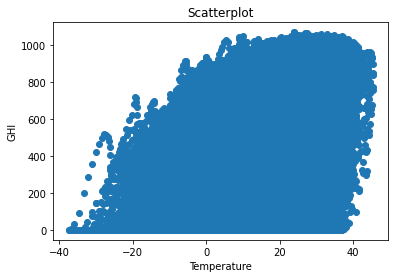

In [21]:
show_scatter_plot('Scatterplot','Temperature','GHI',df["Temperature"],target)

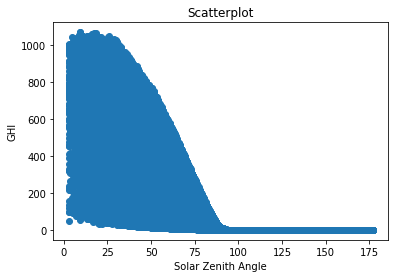

In [23]:
show_scatter_plot('Scatterplot','Solar Zenith Angle','GHI',df["Solar Zenith Angle"],target)

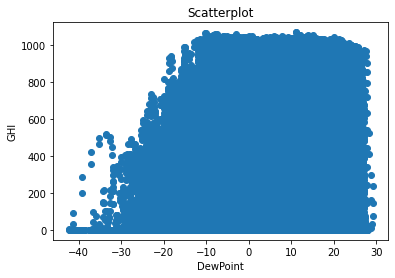

In [25]:
show_scatter_plot('Scatterplot','DewPoint','GHI',df["Dew Point"],target)

In [26]:
df.corr(method ='pearson')
#correlation = df["GHI"].corr(df["Temperature"])
#correlation 
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None, low=0.75, high=1.0)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Latitude,Longitude,Elevation
Year,1.000000,0.000000,0.000000,0.000000,0.000000,0.001702,-0.020137,0.015294,0.003112,-0.101950,-0.010828,-0.017686,-0.004420,-0.005683,-0.108539,-0.000311,-0.016503,0.031281,-0.010131,0.019176,0.003331,-0.000000,-0.000000,-0.000000,0.000000
Month,0.000000,1.000000,0.011893,-0.000000,-0.000000,0.173910,-0.051168,-0.040205,-0.051852,-0.069167,0.147554,-0.048900,-0.010791,-0.035482,-0.047019,0.052259,-0.183097,-0.000264,0.137023,-0.006163,-0.052302,0.000000,-0.000000,-0.000000,0.000000
Day,0.000000,0.011893,1.000000,-0.000000,0.000000,0.009147,-0.001665,0.000711,0.001094,0.001958,0.015415,0.002183,-0.002284,-0.000310,0.012073,-0.001381,-0.001109,-0.003332,0.002220,0.005157,0.005016,-0.000000,0.000000,-0.000000,-0.000000
Hour,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.079479,0.056853,0.058642,0.049268,0.004734,0.026878,0.046243,0.044244,0.044244,-0.123084,-0.086798,-0.000107,-0.002186,0.019287,-0.028699,0.003227,-0.000000,0.000000,-0.000000,0.000000
Minute,0.000000,-0.000000,0.000000,0.000000,1.000000,-0.002188,-0.000188,-0.000121,-0.000017,0.000014,-0.000506,0.000106,-0.000206,-0.000020,0.003824,-0.000008,-0.000000,-0.000126,-0.000002,0.000106,-0.002012,-0.000000,-0.000000,-0.000000,0.000000
Temperature,0.001702,0.173910,0.009147,0.079479,-0.002188,1.000000,0.388221,0.301834,0.409846,-0.205854,0.867344,0.353121,0.304708,0.424583,-0.262451,-0.399647,-0.512712,0.085936,0.740363,-0.132747,0.019319,0.059728,-0.496742,0.188812,-0.101005
Clearsky DHI,-0.020137,-0.051168,-0.001665,0.056853,-0.000188,0.388221,1.000000,0.842843,0.892017,-0.011464,0.209121,0.828866,0.557478,0.757599,-0.384915,-0.852837,-0.084037,0.035003,0.225330,-0.042054,0.079954,0.053405,-0.087938,0.075407,-0.041127
Clearsky DNI,0.015294,-0.040205,0.000711,0.058642,-0.000121,0.301834,0.842843,1.000000,0.910653,-0.093199,0.049706,0.754664,0.755109,0.828164,-0.530198,-0.880075,-0.058499,-0.038209,0.025392,0.016529,0.061701,-0.009434,-0.019689,0.013089,0.043725
Clearsky GHI,0.003112,-0.051852,0.001094,0.049268,-0.000017,0.409846,0.892017,0.910653,1.000000,-0.086739,0.157653,0.837116,0.683349,0.911203,-0.520347,-0.880948,-0.105292,-0.017762,0.144641,-0.010141,0.061866,0.019670,-0.087887,0.059613,0.018412
Cloud Type,-0.101950,-0.069167,0.001958,0.004734,0.000014,-0.205854,-0.011464,-0.093199,-0.086739,1.000000,-0.091043,0.088722,-0.383394,-0.239602,0.257749,0.066296,0.133289,-0.022513,0.067882,-0.103563,0.085916,0.018264,0.217602,-0.102009,-0.004541


# Ranbdom Forest for feature selection

In [27]:
#https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/#:~:text=Random%20Forest%20is%20a%20very,a%20Recursive%20Feature%20Elimination%20procedure.
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [28]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(features)
print(standardized_data.shape)
sample_data = standardized_data

(788400, 24)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(standardized_data , target, test_size=0.33, random_state=42)

In [30]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_text shape",y_test.shape)

x_train shape (528228, 24)
x_test shape (260172, 24)
y_train shape (528228,)
y_text shape (260172,)


In [31]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [ ]:
#All feature
rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")
rfe.fit(X_train,y_train)

'rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")\nrfe.fit(X_train,y_train)'

In [ ]:
selected_features = np.array(features)[rfe.get_support()]

# XGBoost

In [32]:
from datetime import datetime

In [40]:
df = pd.read_csv('/content/drive/Shareddrives/DATA240 Team 3/weather_location_combine.csv')
df


,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Latitude,Longitude,Elevation
0,0,2020,1,1,0,0,-2.9,0,0,0,...,161.09,0.11,987,0.400,277.0,5.4,903523,41.89,-87.62,179
1,1,2020,1,1,0,30,-3.0,0,0,0,...,159.68,0.11,987,0.400,275.0,5.2,903523,41.89,-87.62,179
2,2,2020,1,1,1,0,-3.1,0,0,0,...,156.62,0.11,987,0.400,273.0,5.0,903523,41.89,-87.62,179
3,3,2020,1,1,1,30,-3.1,0,0,0,...,152.47,0.11,987,0.400,270.0,4.9,903523,41.89,-87.62,179
4,4,2020,1,1,2,0,-3.1,0,0,0,...,147.67,0.11,987,0.400,267.0,4.8,903523,41.89,-87.62,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788395,17515,2016,12,31,21,30,-2.0,0,0,0,...,139.45,0.07,1020,0.391,90.0,0.3,241108,47.61,-122.34,49
788396,17516,2016,12,31,22,0,-2.0,0,0,0,...,143.95,0.07,1020,0.392,122.1,0.4,241108,47.61,-122.34,49
788397,17517,2016,12,31,22,30,-2.0,0,0,0,...,148.03,0.07,1020,0.393,122.1,0.4,241108,47.61,-122.34,49
788398,17518,2016,12,31,23,0,-2.0,0,0,0,...,151.47,0.07,1020,0.395,144.7,0.4,241108,47.61,-122.34,49


In [41]:
df['Datetime'] = df['Year'].map(str) + '-' + df['Month'].map(str).str.zfill(2) + '-' + df['Day'].map(str).str.zfill(2)+' ' + df['Hour'].map(str).str.zfill(2)+':' + df['Hour'].map(str).str.zfill(2)+":00"
print (df)
df1 = df.drop(['Year', 'Month', 'Day','Hour','Minute'], axis = 1)

        Unnamed: 0  Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  \
0                0  2020      1    1     0       0         -2.9             0   
1                1  2020      1    1     0      30         -3.0             0   
2                2  2020      1    1     1       0         -3.1             0   
3                3  2020      1    1     1      30         -3.1             0   
4                4  2020      1    1     2       0         -3.1             0   
...            ...   ...    ...  ...   ...     ...          ...           ...   
788395       17515  2016     12   31    21      30         -2.0             0   
788396       17516  2016     12   31    22       0         -2.0             0   
788397       17517  2016     12   31    22      30         -2.0             0   
788398       17518  2016     12   31    23       0         -2.0             0   
788399       17519  2016     12   31    23      30         -2.0             0   

        Clearsky DNI  Clear

In [42]:
df1.columns

Index(['Unnamed: 0', 'Temperature', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI', 'GHI',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Location ID',
       'Latitude', 'Longitude', 'Elevation', 'Datetime'],
      dtype='object')

In [43]:
df1 = df1.drop("Unnamed: 0", axis = 1)

In [44]:
df1.head()

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,...,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Latitude,Longitude,Elevation,Datetime
0,-2.9,0,0,0,0,-4.6,0,0,0,88.28,...,0.11,987,0.4,277.0,5.4,903523,41.89,-87.62,179,2020-01-01 00:00:00
1,-3.0,0,0,0,4,-4.6,0,0,0,88.94,...,0.11,987,0.4,275.0,5.2,903523,41.89,-87.62,179,2020-01-01 00:00:00
2,-3.1,0,0,0,4,-4.7,0,0,0,88.51,...,0.11,987,0.4,273.0,5.0,903523,41.89,-87.62,179,2020-01-01 01:01:00
3,-3.1,0,0,0,4,-4.7,0,0,0,88.51,...,0.11,987,0.4,270.0,4.9,903523,41.89,-87.62,179,2020-01-01 01:01:00
4,-3.1,0,0,0,4,-4.8,0,0,0,87.92,...,0.11,987,0.4,267.0,4.8,903523,41.89,-87.62,179,2020-01-01 02:02:00


In [45]:
df1['Datetime'] = pd.to_datetime(df1['Datetime'])


In [46]:
#https://towardsdatascience.com/time-series-analysis-using-pandas-in-python-f726d87a97d8
df1.dtypes

Temperature                  float64
Clearsky DHI                   int64
Clearsky DNI                   int64
Clearsky GHI                   int64
Cloud Type                     int64
Dew Point                    float64
DHI                            int64
DNI                            int64
GHI                            int64
Relative Humidity            float64
Solar Zenith Angle           float64
Surface Albedo               float64
Pressure                       int64
Precipitable Water           float64
Wind Direction               float64
Wind Speed                   float64
Location ID                    int64
Latitude                     float64
Longitude                    float64
Elevation                      int64
Datetime              datetime64[ns]
dtype: object

In [47]:
data = df1.set_index('Datetime')
data

,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location ID,Latitude,Longitude,Elevation
Datetime,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,-2.9,0,0,0,0,-4.6,0,0,0,88.28,161.09,0.11,987,0.400,277.0,5.4,903523,41.89,-87.62,179
2020-01-01 00:00:00,-3.0,0,0,0,4,-4.6,0,0,0,88.94,159.68,0.11,987,0.400,275.0,5.2,903523,41.89,-87.62,179
2020-01-01 01:01:00,-3.1,0,0,0,4,-4.7,0,0,0,88.51,156.62,0.11,987,0.400,273.0,5.0,903523,41.89,-87.62,179
2020-01-01 01:01:00,-3.1,0,0,0,4,-4.7,0,0,0,88.51,152.47,0.11,987,0.400,270.0,4.9,903523,41.89,-87.62,179
2020-01-01 02:02:00,-3.1,0,0,0,4,-4.8,0,0,0,87.92,147.67,0.11,987,0.400,267.0,4.8,903523,41.89,-87.62,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 21:21:00,-2.0,0,0,0,0,-7.0,0,0,0,68.00,139.45,0.07,1020,0.391,90.0,0.3,241108,47.61,-122.34,49
2016-12-31 22:22:00,-2.0,0,0,0,1,-7.0,0,0,0,66.53,143.95,0.07,1020,0.392,122.1,0.4,241108,47.61,-122.34,49
2016-12-31 22:22:00,-2.0,0,0,0,0,-7.0,0,0,0,66.52,148.03,0.07,1020,0.393,122.1,0.4,241108,47.61,-122.34,49


In [48]:
data.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:00',
               '2020-01-01 01:01:00', '2020-01-01 01:01:00',
               '2020-01-01 02:02:00', '2020-01-01 02:02:00',
               '2020-01-01 03:03:00', '2020-01-01 03:03:00',
               '2020-01-01 04:04:00', '2020-01-01 04:04:00',
               ...
               '2016-12-31 19:19:00', '2016-12-31 19:19:00',
               '2016-12-31 20:20:00', '2016-12-31 20:20:00',
               '2016-12-31 21:21:00', '2016-12-31 21:21:00',
               '2016-12-31 22:22:00', '2016-12-31 22:22:00',
               '2016-12-31 23:23:00', '2016-12-31 23:23:00'],
              dtype='datetime64[ns]', name='Datetime', length=788400, freq=None)

In [49]:
#We can set frequency Available frequencies in pandas include hourly (‘H’), 
#calendar daily (‘D’), business daily (‘B’), weekly (‘W’), monthly (‘M’), 
#quarterly (‘Q’), annual (‘A’), and many others
data_freq = data.asfreq('D')
data_freq

ValueError: ignored

In [50]:
data_columns = ['GHI', 'Dew Point','Solar Zenith Angle','Surface Albedo','Precipitable Water','Relative Humidity','Temperature','Wind Speed']
data_weekly_mean = data[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean

,GHI,Dew Point,Solar Zenith Angle,Surface Albedo,Precipitable Water,Relative Humidity,Temperature,Wind Speed
Datetime,,,,,,,,
2016-01-03,80.757716,-1.300154,107.833380,0.527106,1.104284,80.793202,2.481481,3.008410
2016-01-10,72.471561,0.054233,107.420185,0.449219,1.316042,86.708581,2.786706,3.138294
2016-01-17,79.023148,-1.317130,106.623436,0.513517,1.221095,82.906253,2.054894,3.098512
2016-01-24,88.423942,-1.437500,105.568545,0.447476,1.074451,82.163118,2.065476,2.844048
2016-01-31,94.404101,1.826720,104.274286,0.403997,1.298128,84.148439,5.223876,2.959127
...,...,...,...,...,...,...,...,...
2020-12-06,83.881283,0.226984,107.290423,0.202672,1.119312,73.019563,5.349603,2.717460
2020-12-13,73.293651,1.188624,107.851749,0.286792,1.171825,76.520999,5.758003,2.601653
2020-12-20,71.775132,-0.494709,108.140470,0.353638,1.142460,76.996485,3.466799,2.670866


In [51]:
data_monthly_max = data[data_columns].resample('M').max() # W stands for weekly
data_monthly_max

,GHI,Dew Point,Solar Zenith Angle,Surface Albedo,Precipitable Water,Relative Humidity,Temperature,Wind Speed
Datetime,,,,,,,,
2016-01-31,798,23.0,176.94,0.866,5.444,100.0,27.0,14.4
2016-02-29,917,23.0,171.43,0.866,4.924,100.0,26.0,15.0
2016-03-31,974,24.0,161.63,0.866,5.066,100.0,28.0,14.2
2016-04-30,1025,24.0,149.48,0.866,5.895,100.0,30.0,12.9
2016-05-31,1069,25.0,138.90,0.866,6.251,100.0,32.0,11.5
2016-06-30,1058,27.0,132.03,0.173,6.617,100.0,37.0,8.2
2016-07-31,1028,27.0,136.07,0.177,6.828,100.0,39.0,8.7
2016-08-31,1002,27.0,145.68,0.176,7.067,100.0,41.0,8.4
2016-09-30,956,27.0,157.05,0.173,6.326,100.0,38.0,12.8


In [52]:
#To compute a 7-day rolling mean
#center = True means for the time bin, say Jan 1 to Jan 8, the rolling mean would be 
#calculated and placed next to the center of the bin i.e. Jan 4. To make it clearer
data_7d_rol = data[data_columns].rolling(window = 7, center = True).mean()
data_7d_rol

,GHI,Dew Point,Solar Zenith Angle,Surface Albedo,Precipitable Water,Relative Humidity,Temperature,Wind Speed
Datetime,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:01:00,0.0,-4.714286,151.014286,0.11,0.400000,88.504286,-3.085714,4.985714
2020-01-01 02:02:00,0.0,-4.742857,146.795714,0.11,0.400000,88.671429,-3.142857,4.914286
...,...,...,...,...,...,...,...,...
2016-12-31 21:21:00,0.0,-6.714286,138.860000,0.07,0.392571,67.645714,-2.000000,0.385714
2016-12-31 22:22:00,0.0,-6.857143,143.042857,0.07,0.392857,67.068571,-2.000000,0.357143
2016-12-31 22:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data_365d_rol = data[data_columns].rolling(window = 365, center = True).mean()

Text(0.5, 1.0, 'Trends in GHI')

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


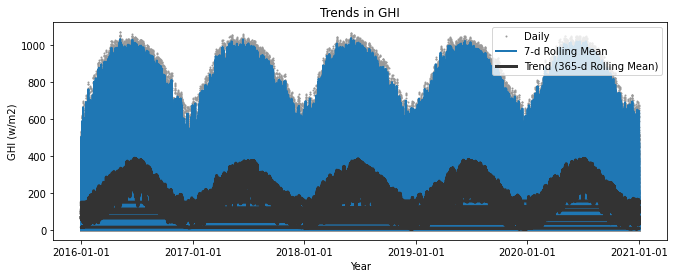

In [54]:
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(data['GHI'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(data_7d_rol['GHI'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(data_365d_rol['GHI'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('GHI (w/m2)')
ax.set_title('Trends in GHI')

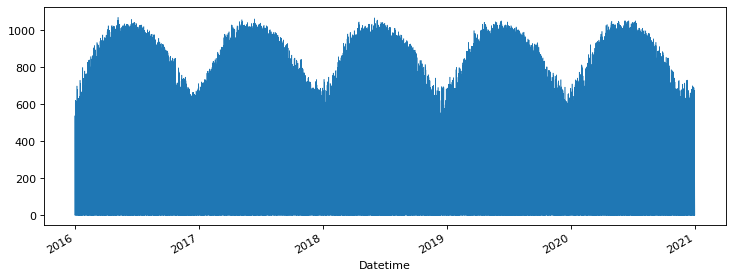

In [55]:
plt.figure(figsize=(11,4), dpi= 80)
data['GHI'].plot(linewidth = 0.5)

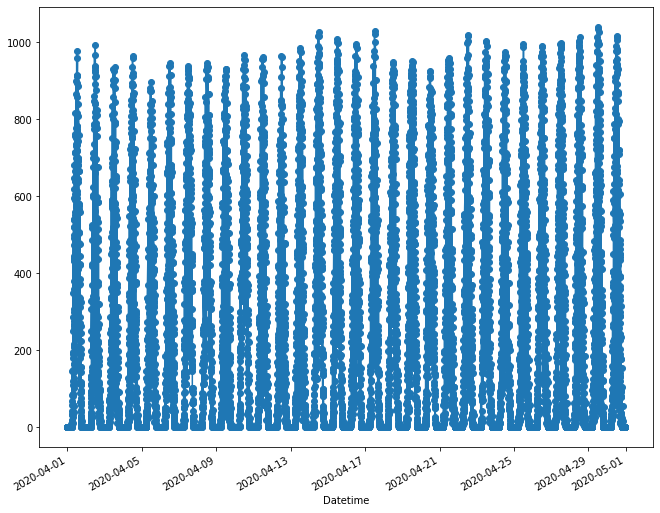

In [56]:
#Weekly Oscilation
data.loc['2020-04': '2020-04','GHI'].plot(marker = 'o', figsize=(11, 9))

In [57]:
# Extract the year, month, date separately using the index set
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday_Name'] = data.index.weekday

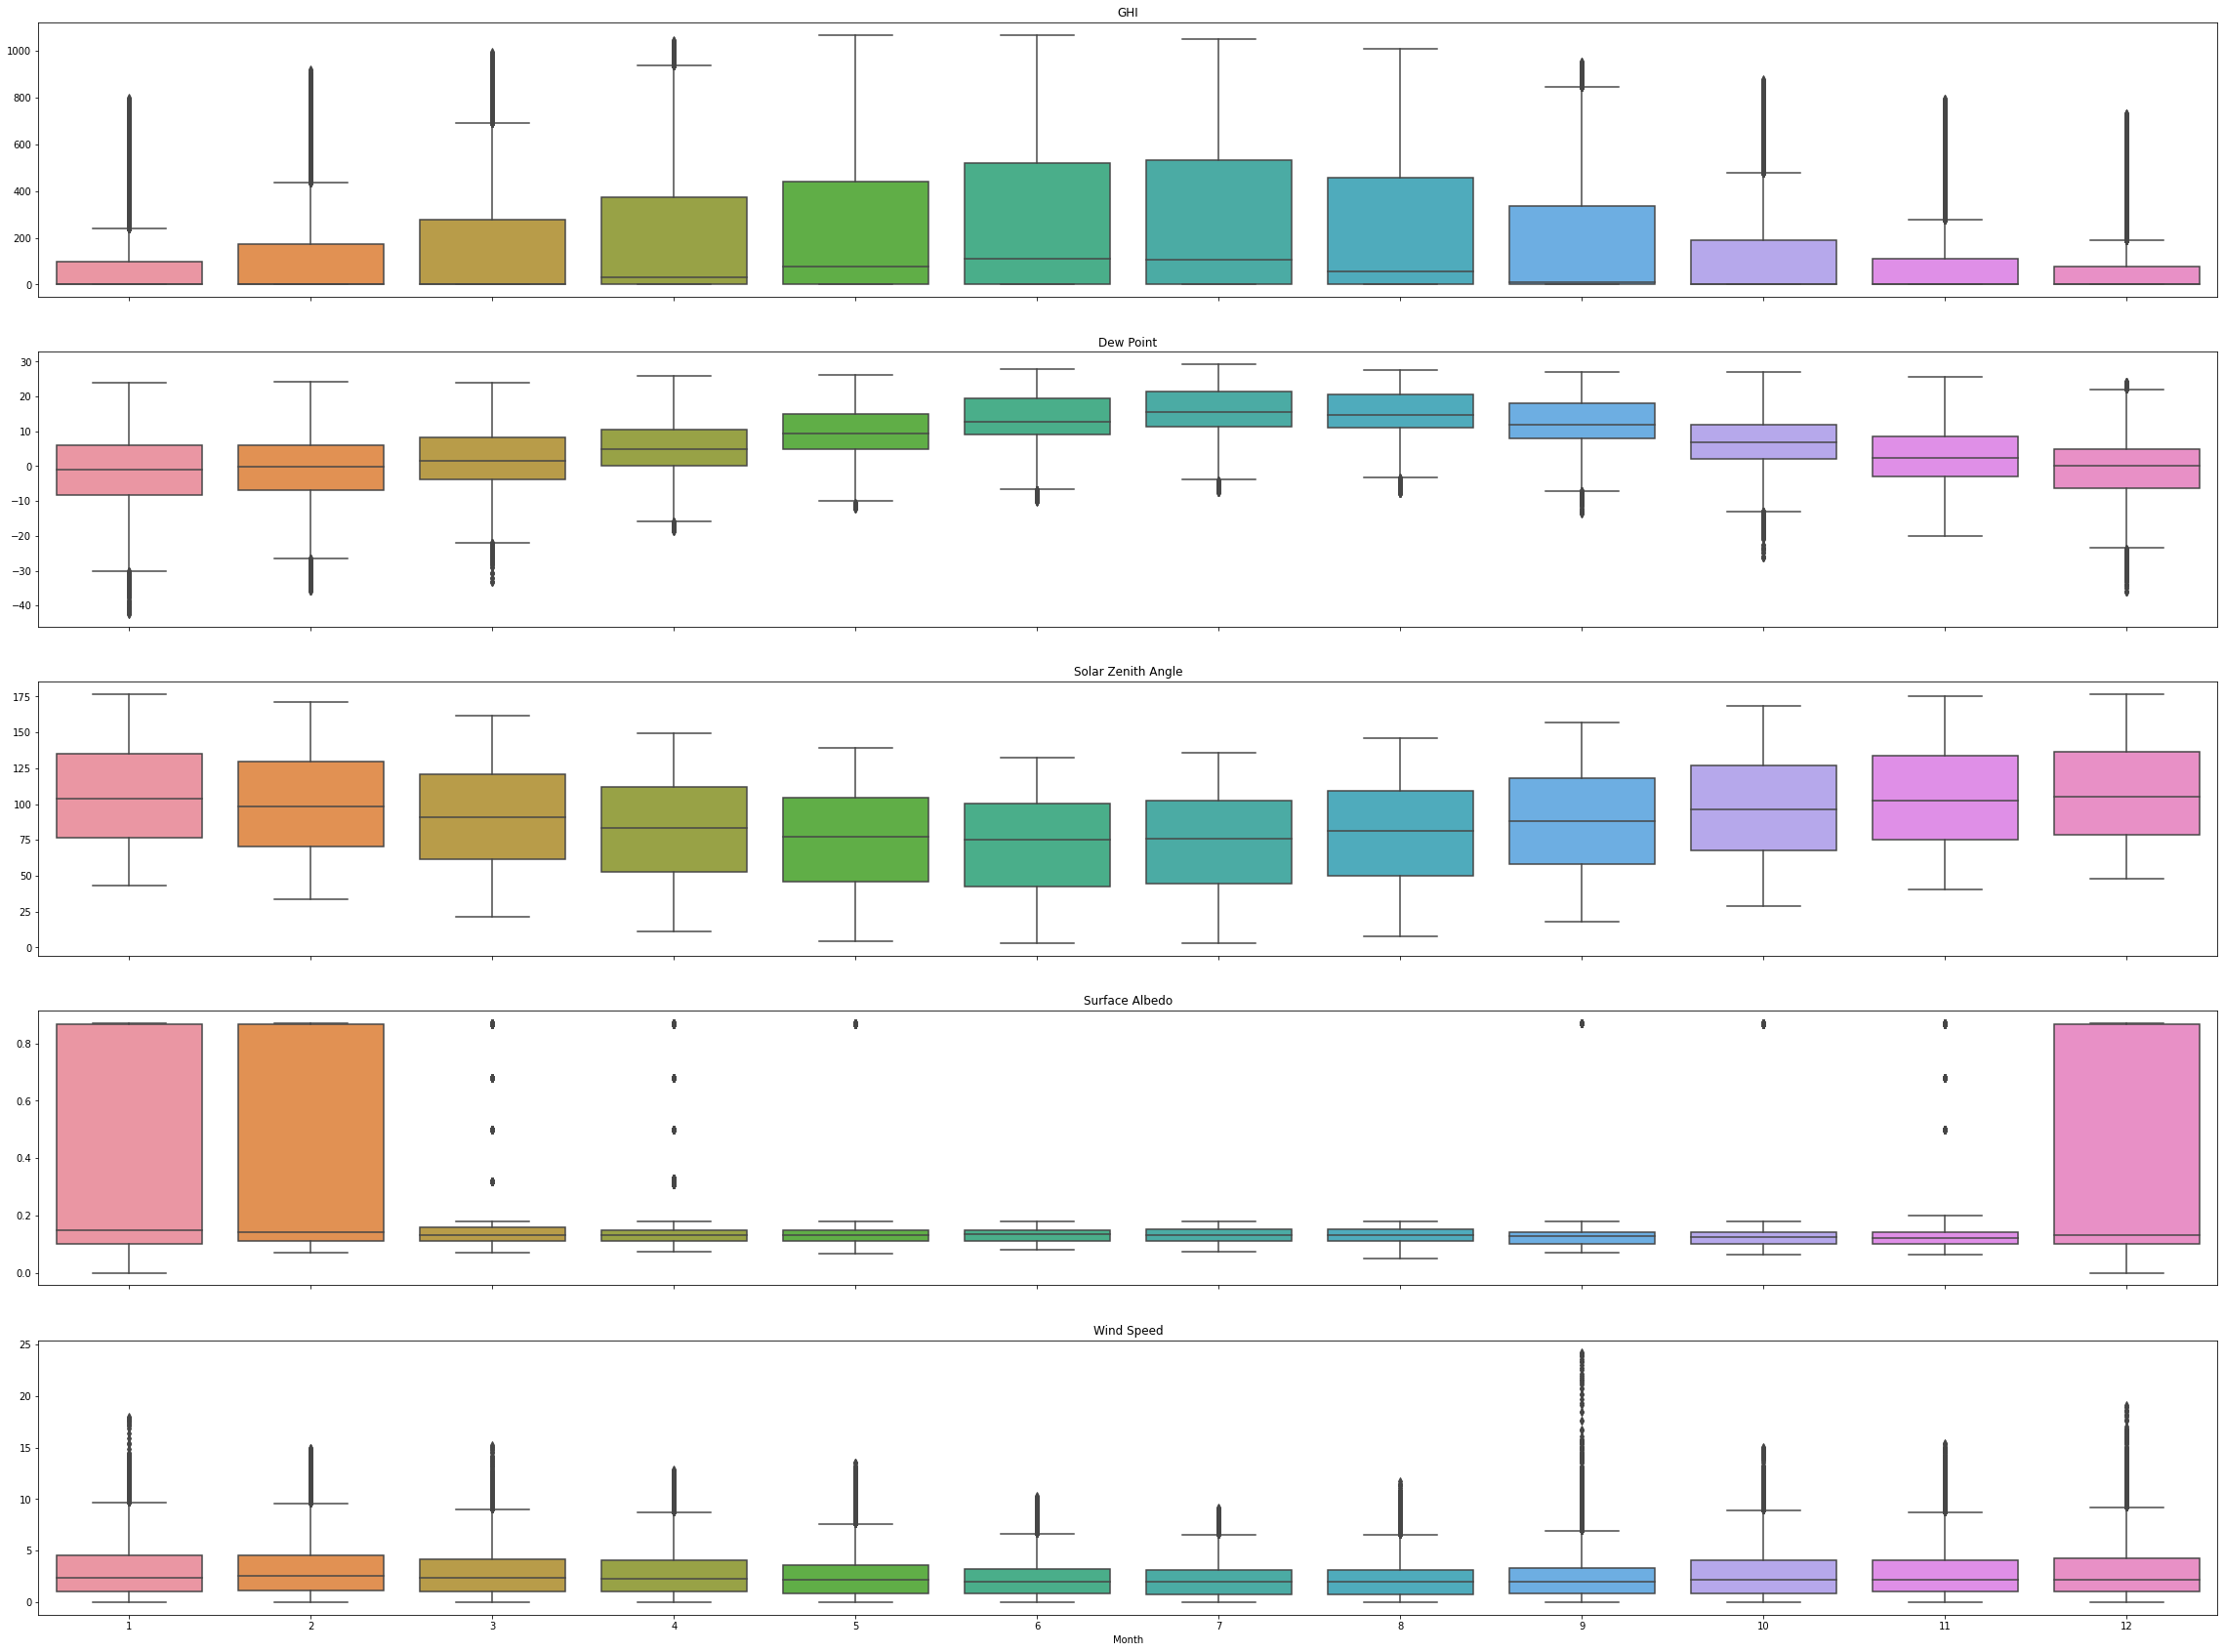

In [65]:
import seaborn as sns
fig, axes = plt.subplots(5, 1, figsize=(40, 30), sharex=True)
for name, ax in zip(['GHI','Dew Point', 'Solar Zenith Angle','Surface Albedo','Wind Speed'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('')
    ax.set_title(name)
    # Keep the x-axis label for only the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

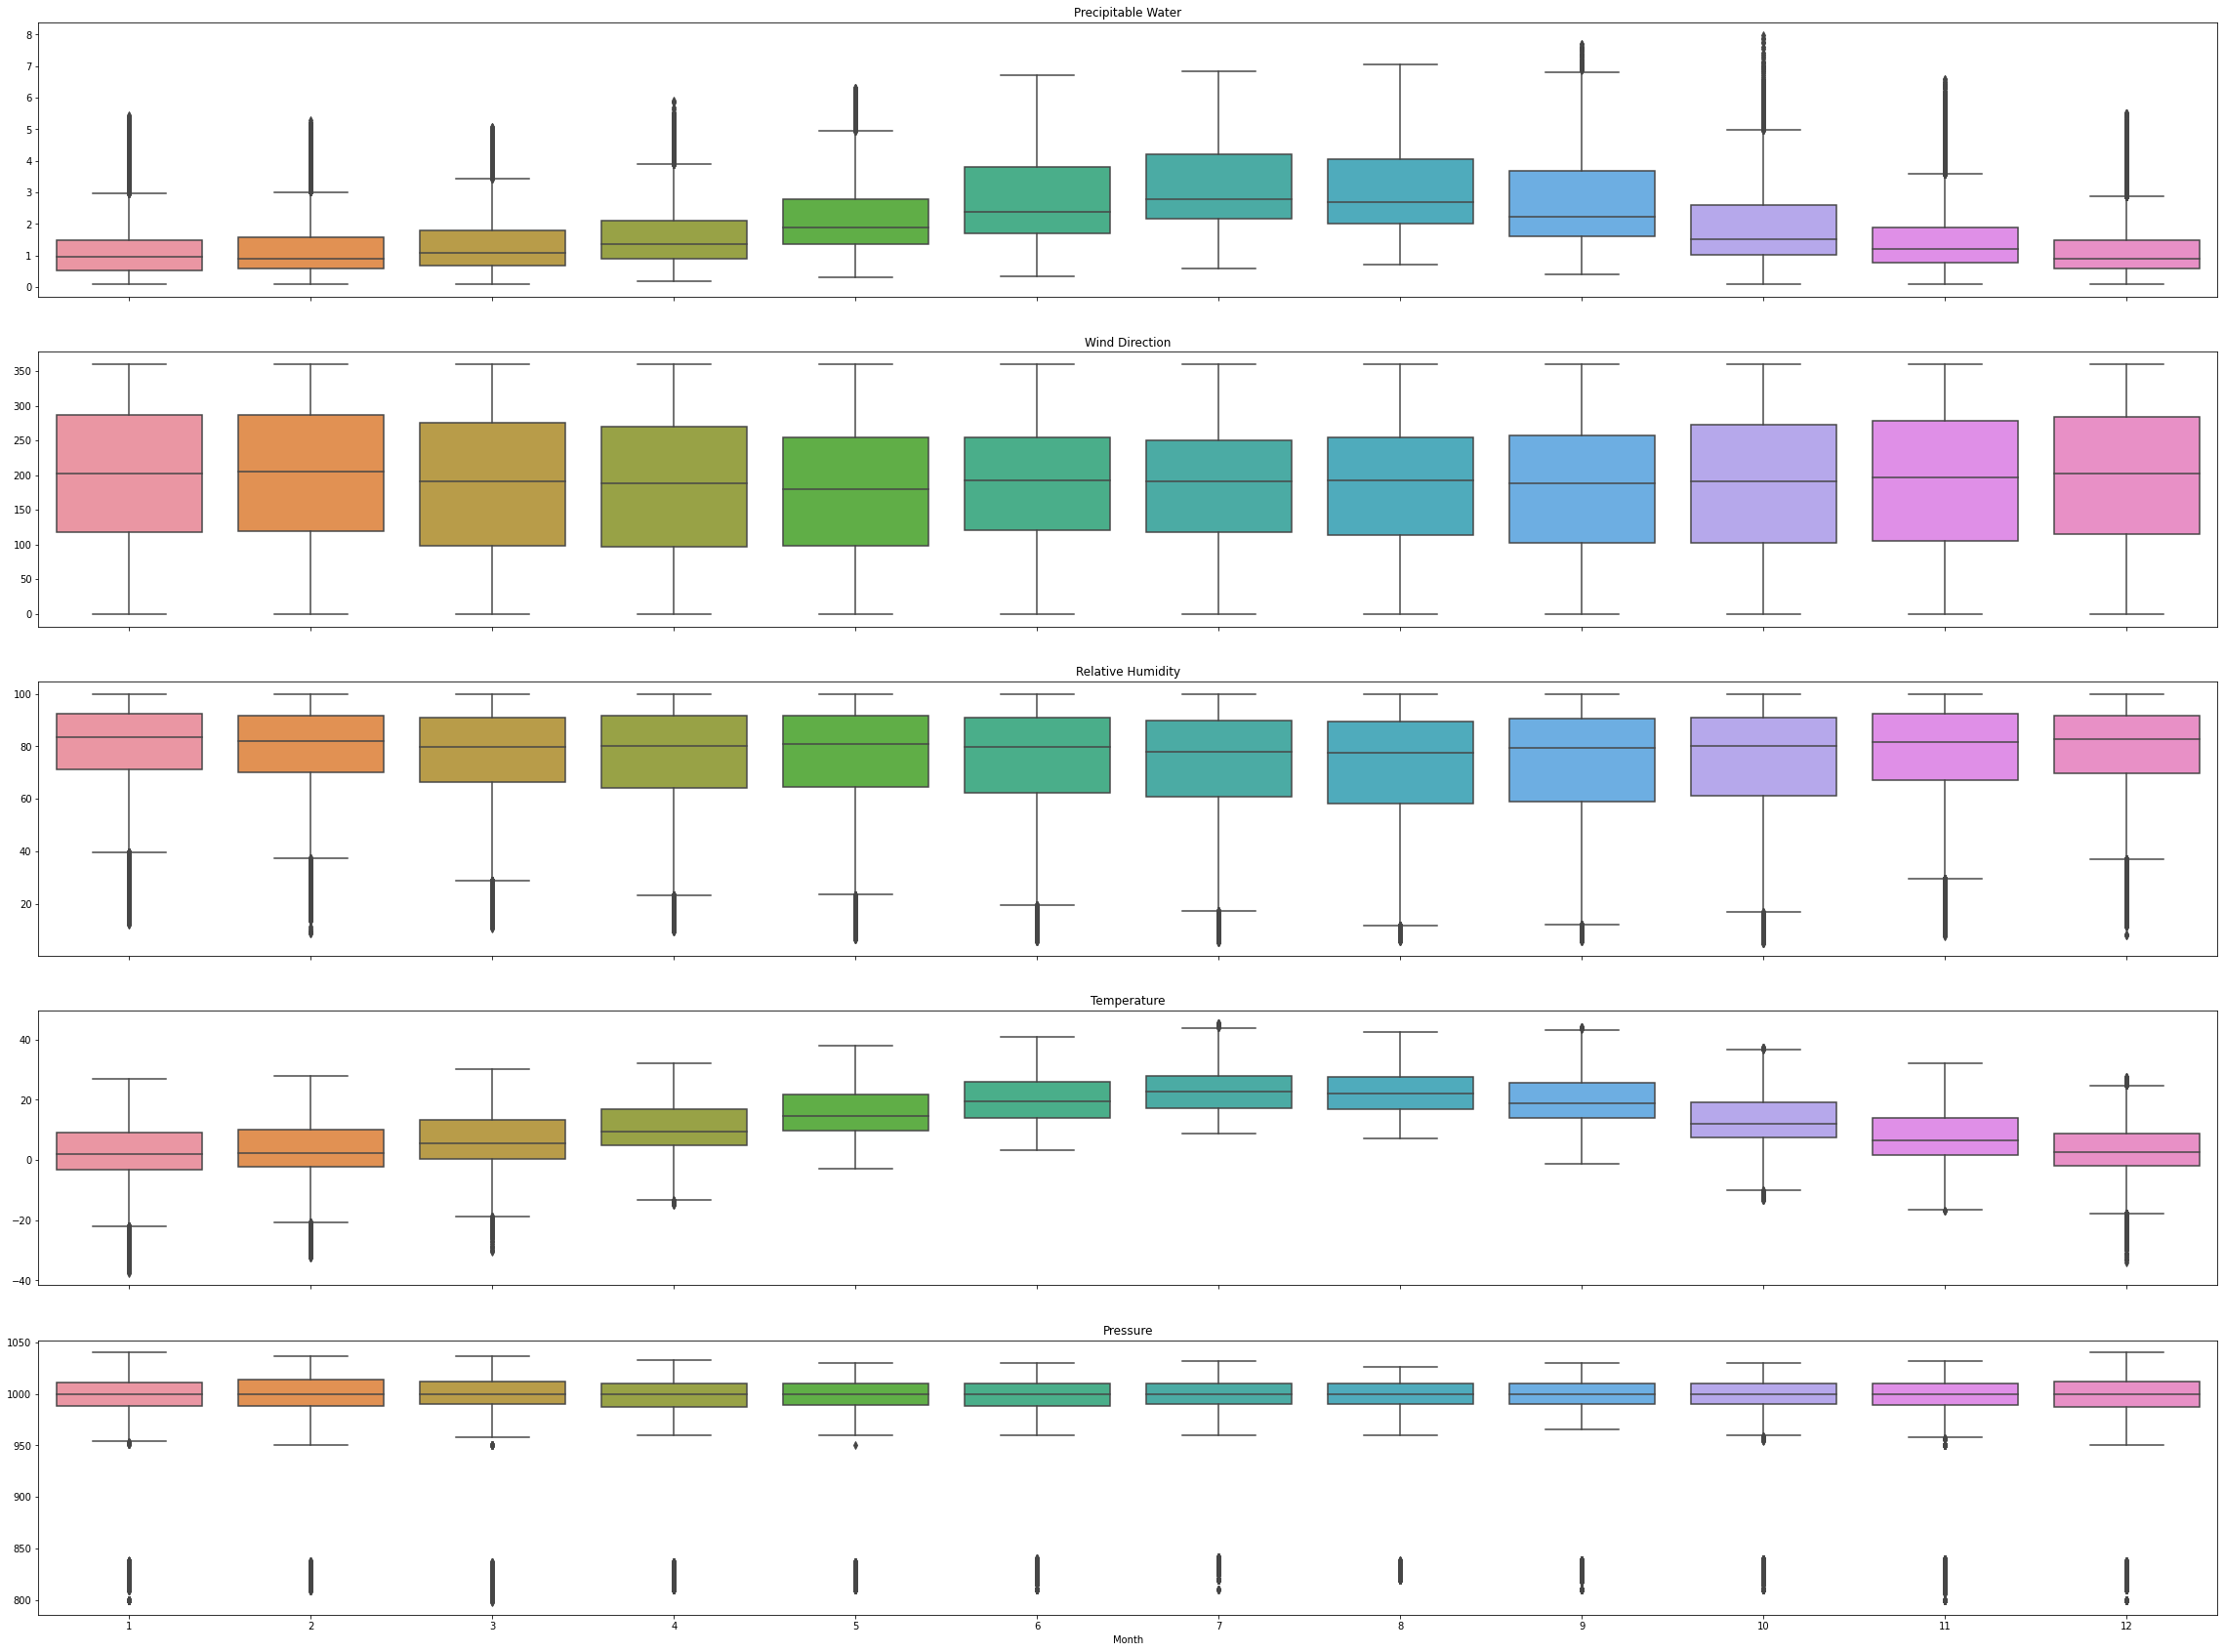

In [66]:
import seaborn as sns
fig, axes = plt.subplots(5, 1, figsize=(40, 30), sharex=True)
for name, ax in zip(['Precipitable Water','Wind Direction','Relative Humidity','Temperature','Pressure'], axes):
    sns.boxplot(data=data, x='Month', y=name, ax=ax)
    ax.set_ylabel('')
    ax.set_title(name)
    # Keep the x-axis label for only the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

Datetime              datetime64[ns]
GHI                            int64
Cloud Type                     int64
Dew Point                    float64
Solar Zenith Angle           float64
Surface Albedo               float64
Wind Speed                   float64
Precipitable Water           float64
Wind Direction                 int64
Relative Humidity            float64
Temperature                  float64
Pressure                       int64
dtype: object